In [1]:
import pandas as pd

In [2]:
oil_price = (pd.read_csv('data/DCOILBRENTEU.csv')
            .assign(Date= lambda oil_price: pd.to_datetime(oil_price['Date']))
            .assign(DCOILBRENTEU = lambda oil_price: pd.to_numeric(oil_price['DCOILBRENTEU'], errors = 'coerce')))

In [3]:
sp500 = (pd.read_csv('data/SP500.csv')
            .assign(Date= lambda SP500: pd.to_datetime(SP500['Date']))
            .assign(SP500 = lambda SP500: pd.to_numeric(SP500['SP500'], errors = 'coerce')))

In [4]:
tsla =  (pd.read_csv('data/TSLA.csv')
        .assign(Date= lambda tsla: pd.to_datetime(tsla['Date'])))

In [5]:
nvda = (pd.read_csv('data/NVDA.csv')
       .assign(Date = lambda nvda: pd.to_datetime(nvda['Date'])))

In [6]:
oil_sp = pd.merge(oil_price, sp500, on= ['Date'])

In [7]:
oil_sp_nvda = pd.merge(oil_sp,nvda, on = ['Date'])

In [8]:
oil_sp_nvda_tsla = pd.merge(oil_sp_nvda, tsla, on = ['Date'], suffixes=("_nvda", "_tsla")).set_index(['Date'])

In [9]:
# after merge our dataset, we firstly oversee the summary for two company's stock:
oil_sp_nvda_tsla.loc['2020-02':'2022-02'].describe()
# We can clearly see that Tesla stock has more volatility, based on the closing price, 
# Although its minimum closing price is almots as same as NVDA's price, but more invester choose them during
# the period after pandemic.

,DCOILBRENTEU,SP500,Open_nvda,High_nvda,Low_nvda,Close_nvda,Adj Close_nvda,Volume_nvda,Open_tsla,High_tsla,Low_tsla,Close_tsla,Adj Close_tsla,Volume_tsla
count,515.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,5.230000e+02,523.000000,523.000000,523.000000,523.000000,523.000000,5.230000e+02
mean,58.614757,3820.141185,158.267375,161.222017,155.034637,158.254680,158.132905,4.349079e+07,582.298934,595.792500,567.663079,582.427685,582.427685,4.784043e+07
std,19.850028,623.589505,69.189818,70.665761,67.272024,68.905262,68.941160,2.124735e+07,297.072621,303.236455,289.903597,296.732384,296.732384,3.611740e+07
min,9.100000,2237.400000,50.025002,52.485001,45.169998,49.099998,48.997280,9.788400e+06,74.940002,80.972000,70.101997,72.244003,72.244003,9.800600e+06
25%,42.600000,3335.080000,112.782501,113.899998,109.978748,112.572498,112.388263,2.716800e+07,321.000000,330.117996,297.800003,312.311996,312.311996,2.338600e+07
50%,61.200000,3871.740000,137.399994,138.845001,134.589996,136.532501,136.390121,3.789000e+07,641.869995,654.320007,620.549988,643.380005,643.380005,3.435170e+07
75%,73.650000,4384.640000,205.139999,207.875000,202.488754,205.769996,205.691558,5.626600e+07,779.445007,796.010010,769.994995,781.304993,781.304993,6.314155e+07
max,103.100000,4796.560000,335.170013,346.470001,320.359985,333.760010,333.662292,1.463684e+08,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,3.046940e+08


In [10]:
# the range for the oil price, SP500 and two stocks prices are big, we can estimate that during the pandemic,
# both of them exprienced a huge flactulation. 
# Next, We use line charts to more intuitively see their trends before and after the epidemic.

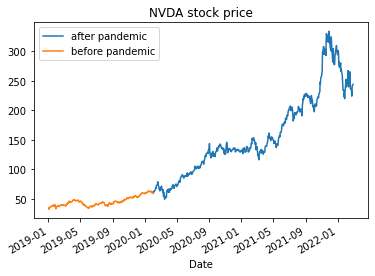

In [11]:
# 
oil_sp_nvda_tsla.loc['2020-02' : '2022-02', 'Close_nvda'].plot()
oil_sp_nvda_tsla.loc['2019-01' : '2020-01', 'Close_nvda'].plot(title = 'NVDA stock price').legend(['after pandemic', 'before pandemic'])

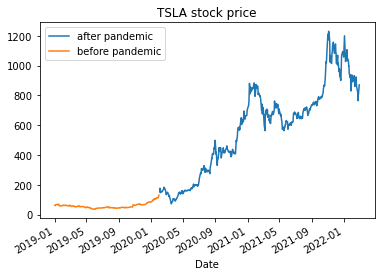

In [12]:
oil_sp_nvda_tsla.loc['2020-02' : '2022-02', 'Close_tsla'].plot()
oil_sp_nvda_tsla.loc['2019-01' : '2020-01', 'Close_tsla'].plot(title = 'TSLA stock price').legend(['after pandemic', 'before pandemic'])


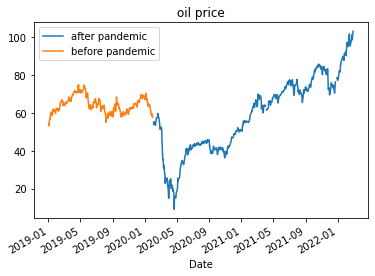

In [13]:
oil_sp_nvda_tsla.loc['2020-02' : '2022-02', 'DCOILBRENTEU'].plot()
oil_sp_nvda_tsla.loc['2019-01' : '2020-01', 'DCOILBRENTEU'].plot(title = 'oil price').legend(['after pandemic', 'before pandemic'])


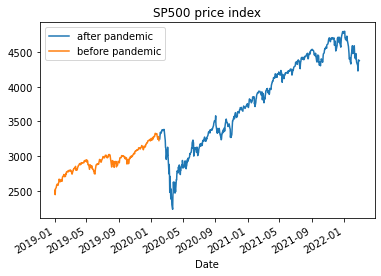

In [14]:
oil_sp_nvda_tsla.loc['2020-02' : '2022-02', 'SP500'].plot()
oil_sp_nvda_tsla.loc['2019-01' : '2020-01', 'SP500'].plot(title = 'SP500 price index').legend(['after pandemic', 'before pandemic'])


In [15]:
# now we can see that after pandemic, the stock prices of these two high-tech companies have soared. 
# We will conduct in-depth research on the impact of the pandemic on the development of traditional industrial products 
# and high-tech enterprises.

# Because the bases number of each indicator are different, we will analyze the growth rate of each indicator before and after the epidemic, 
# and use a simple econometric model to analyze the impact of oil prices and SP500 on these two stocks.

In [16]:
# we first construct a new dataset

In [17]:
stock_price_anal = oil_sp_nvda_tsla[['Close_nvda', 'Close_tsla', 'DCOILBRENTEU', 'SP500']].dropna()

In [18]:
# double check it there any NAN value in the table
stock_price_anal[stock_price_anal.isnull().any(axis=1)]

,Close_nvda,Close_tsla,DCOILBRENTEU,SP500
Date,,,,


In [19]:
# Because the stock price fluctuates greatly in a single day, I choose to perform a moving average based on the time period of 14 days.
# stock_price_anal['tsla_ma14'] = stock_price_anal['Close_tsla'].rolling(14).mean()
# stock_price_anal['nvda_ma14'] = stock_price_anal['Close_nvda'].rolling(14).mean()
# stock_price_anal

In [20]:
# stock_price_anal.loc['2020-02' : '2022-02', 'Close_tsla'].plot()
# stock_price_anal.loc['2020-02' : '2022-02', 'tsla_ma14'].plot().legend(['after MA', 'before MA'])
# stock_price_anal.loc['2020-02' : '2022-02', 'Close_nvda'].plot()
# stock_price_anal.loc['2020-02' : '2022-02', 'nvda_ma14'].plot().legend(['after MA', 'before MA'])


In [21]:
# mutate variables for calculating growth rates
stock_price_anal['growth_nvda'] =  stock_price_anal['Close_nvda'].pct_change()*100
stock_price_anal['growth_tsla'] =  stock_price_anal['Close_tsla'].pct_change()*100
stock_price_anal['growth_oil_price'] =  stock_price_anal['DCOILBRENTEU'].pct_change()*100
stock_price_anal['growth_sp'] =  stock_price_anal['SP500'].pct_change()*100



In [22]:
stock_price_anal

,Close_nvda,Close_tsla,DCOILBRENTEU,SP500,growth_nvda,growth_tsla,growth_oil_price,growth_sp
Date,,,,,,,,
2019-01-02,34.055000,62.023998,54.1,2510.03,NaN,NaN,NaN,NaN
2019-01-03,31.997499,60.071999,53.2,2447.89,-6.041700,-3.147167,-1.663586,-2.475668
2019-01-04,34.047501,63.537998,55.6,2531.94,6.406757,5.769741,4.511278,3.433569
2019-01-07,35.849998,66.991997,57.1,2549.69,5.294065,5.436116,2.697842,0.701043
2019-01-08,34.957500,67.070000,56.9,2574.41,-2.489534,0.116436,-0.350263,0.969530
...,...,...,...,...,...,...,...,...
2022-02-23,223.869995,764.039978,99.3,4225.50,-4.288157,-6.997924,0.607903,-1.841218
2022-02-24,237.479996,800.770020,101.3,4288.70,6.079422,4.807346,2.014099,1.495681
2022-02-25,241.570007,809.869995,98.6,4384.65,1.722255,1.136403,-2.665350,2.237275


In [23]:
# then I set two company's stock price's grwoth rates as  dependent variable, 
# SP500 and oil price's growth rates as dependent variable, analysing the effect of change in oil price on these two company's stock prices

In [25]:
from  statsmodels.graphics.tsaplots import plot_acf, plot_pacf

/opt/conda/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


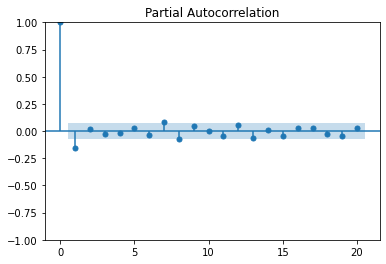

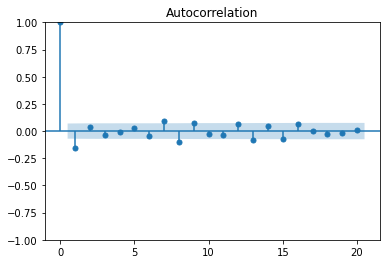

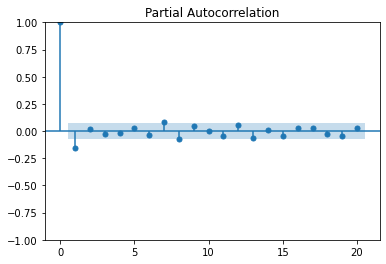

In [26]:
plot_acf(stock_price_anal[['growth_nvda']].dropna(), lags = 20)
plot_pacf(stock_price_anal[['growth_nvda']].dropna(), lags = 20)

/opt/conda/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


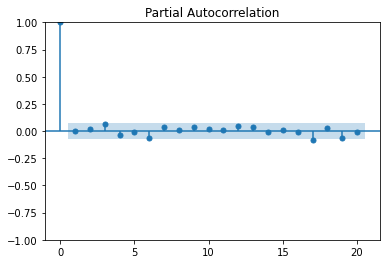

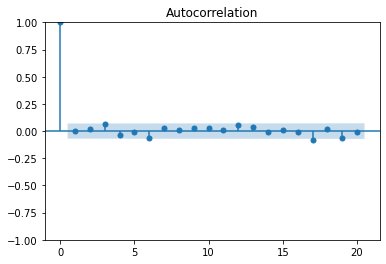

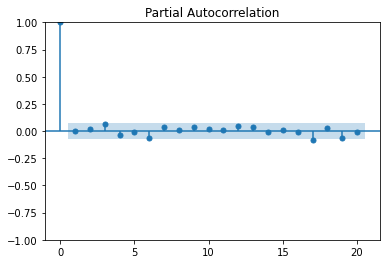

In [27]:
plot_acf(stock_price_anal[['growth_tsla']].dropna(), lags = 20)
plot_pacf(stock_price_anal[['growth_tsla']].dropna(), lags = 20)


In [101]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(stock_price_anal[['Close_tsla']], order = (3,0,3))
arima_result = model.fit()
arima_result.summary()
# we can see that tsla stock price is autocorrelated and moving average in its lagged variable

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Close_tsla   No. Observations:                  789
Model:                 ARIMA(3, 0, 3)   Log Likelihood               -3520.011
Date:                Wed, 16 Mar 2022   AIC                           7056.021
Time:                        19:50:04   BIC                           7093.387
Sample:                             0   HQIC                          7070.385
                                - 789                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        401.0124    402.853      0.995      0.320    -388.565    1190.590
ar.L1          0.8849      0.408      2.167      0.030       0.085       1.685
ar.L2          0.6441      0.182      3.533      0.000       0.287       1.001
ar.L3         -0.5299      0.358     -1.482      0.138      -1.231       0.171
ma.L1          0.0861      0.400      0.215      0.830      -0.698       0.870
ma.L2         -0.5672      0.358     -1.585      0.113      -1.269       0.134
ma.L3          0.0734      0.025      2.889      0.004       0.024       0.123
sigma2       435.9494      9.382     46.466      0.000     417.561     454.338
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3102.44
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):             198.13   Skew:                             0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [102]:
model = sm.tsa.arima.ARIMA(stock_price_anal[['Close_nvda']], order = (3,0,3))
arima_result = model.fit()
arima_result.summary()
# we can see that tsla stock price is autocorrelated and moving average in its lagged variable

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Close_nvda   No. Observations:                  789
Model:                 ARIMA(3, 0, 3)   Log Likelihood               -2310.258
Date:                Wed, 16 Mar 2022   AIC                           4636.516
Time:                        19:52:24   BIC                           4673.882
Sample:                             0   HQIC                          4650.880
                                - 789                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        118.9951    139.879      0.851      0.395    -155.163     393.153
ar.L1          2.2399      0.124     18.110      0.000       1.997       2.482
ar.L2         -1.6587      0.243     -6.829      0.000      -2.135      -1.183
ar.L3          0.4186      0.124      3.385      0.001       0.176       0.661
ma.L1         -1.3187      0.123    -10.711      0.000      -1.560      -1.077
ma.L2          0.4291      0.139      3.082      0.002       0.156       0.702
ma.L3          0.0812      0.028      2.930      0.003       0.027       0.136
sigma2        20.2907      0.489     41.499      0.000      19.332      21.249
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              2125.85
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):              42.93   Skew:                             0.52
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [30]:
# from the result, we can expect these two variables might exist cointegration problem
# Since their first-order lag autoregressive coefficients are close to 1, 
# it is likely that they have unit roots
# then I regress the two stock prices for SP500 and oil price, 
# since stock prices might not be affected by oil price and SP500 immediately,
# I estimate these two variables could have same lag effects on stock price,
# in this case, I assume the lag effect of oil price and SP 500 about three backward periods to stock prices 

In [31]:
stock_price_anal

,Close_nvda,Close_tsla,DCOILBRENTEU,SP500,growth_nvda,growth_tsla,growth_oil_price,growth_sp
Date,,,,,,,,
2019-01-02,34.055000,62.023998,54.1,2510.03,NaN,NaN,NaN,NaN
2019-01-03,31.997499,60.071999,53.2,2447.89,-6.041700,-3.147167,-1.663586,-2.475668
2019-01-04,34.047501,63.537998,55.6,2531.94,6.406757,5.769741,4.511278,3.433569
2019-01-07,35.849998,66.991997,57.1,2549.69,5.294065,5.436116,2.697842,0.701043
2019-01-08,34.957500,67.070000,56.9,2574.41,-2.489534,0.116436,-0.350263,0.969530
...,...,...,...,...,...,...,...,...
2022-02-23,223.869995,764.039978,99.3,4225.50,-4.288157,-6.997924,0.607903,-1.841218
2022-02-24,237.479996,800.770020,101.3,4288.70,6.079422,4.807346,2.014099,1.495681
2022-02-25,241.570007,809.869995,98.6,4384.65,1.722255,1.136403,-2.665350,2.237275


In [96]:
y = stock_price_anal[['growth_nvda']] 
# create lagged variable for oil price growth rate
stock_price_anal[['lag1_growth_oil_price']] = stock_price_anal[['growth_oil_price']].shift(1)
stock_price_anal[['lag2_growth_oil_price']]  = stock_price_anal[['growth_oil_price']].shift(2)
stock_price_anal[['lag3_growth_oil_price']] = stock_price_anal[['growth_oil_price']].shift(3)
stock_price_anal[['lag4_growth_oil_price']]  = stock_price_anal[['growth_oil_price']].shift(4)
stock_price_anal[['lag5_growth_oil_price']]  = stock_price_anal[['growth_oil_price']].shift(5)


# create lagged variable for SP500 growth rate
stock_price_anal[['lag1_growth_sp']] = stock_price_anal[['growth_sp']].shift(1)
stock_price_anal[['lag2_growth_sp']] = stock_price_anal[['growth_sp']].shift(2)
stock_price_anal[['lag3_growth_sp']] = stock_price_anal[['growth_sp']].shift(3)
stock_price_anal[['lag4_growth_sp']] = stock_price_anal[['growth_sp']].shift(4)
stock_price_anal[['lag5_growth_sp']] = stock_price_anal[['growth_sp']].shift(5)

# create independent variable
X = stock_price_anal[['lag1_growth_oil_price', 'lag2_growth_oil_price', 'lag3_growth_oil_price', 'lag4_growth_oil_price', 
                      'lag5_growth_oil_price', 'lag1_growth_sp', 'lag2_growth_sp', 'lag3_growth_sp', 'lag4_growth_sp', 'lag5_growth_sp']]
nvda_reg = sm.OLS(y, X, missing = 'drop').fit()
nvda_reg_resid = sm.OLS(y, X, missing = 'drop').fit().resid
nvda_reg_resid


Date
2019-01-10    2.015724
2019-01-11    2.196305
2019-01-14    0.524236
2019-01-15   -0.594103
2019-01-16    0.185821
                ...   
2022-02-23   -4.865325
2022-02-24    4.877084
2022-02-25    2.581821
2022-02-28    1.961929
2022-03-01   -3.944987
Length: 783, dtype: float64

In [98]:
# then use augmented Dickey-Fuller test to test whether the resid has unit root
from statsmodels.tsa.stattools import adfuller
adfuller(nvda_reg_resid)


(-27.18602559629717,
 0.0,
 0,
 782,
 {'1%': -3.4387398917732193,
  '5%': -2.8652430432199654,
  '10%': -2.5687418568690683},
 3800.865210148836)

In [99]:
# we can see that test-statistic is -27.19, p- value is 0, we can reject null hypothesis that resid has unit root, so resid is not I(1),
# on the other hand, we can conclude that the growth rate of nvda's stock price, oil price, SP500 are cointegrated, 
nvda_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            growth_nvda   R-squared (uncentered):                   0.084
Model:                            OLS   Adj. R-squared (uncentered):              0.072
Method:                 Least Squares   F-statistic:                              7.100
Date:                Wed, 16 Mar 2022   Prob (F-statistic):                    9.55e-11
Time:                        19:49:00   Log-Likelihood:                         -1968.0
No. Observations:                 783   AIC:                                      3956.
Df Residuals:                     773   BIC:                                      4003.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
lag1_growth_oil_price     0.0115      0.027      0.429      0.668      -0.041       0.064
lag2_growth_oil_price     0.0706      0.027      2.632      0.009       0.018       0.123
lag3_growth_oil_price     0.0796      0.027      2.919      0.004       0.026       0.133
lag4_growth_oil_price    -0.0253      0.027     -0.924      0.356      -0.079       0.028
lag5_growth_oil_price    -0.0068      0.027     -0.250      0.803      -0.060       0.047
lag1_growth_sp           -0.5290      0.087     -6.051      0.000      -0.701      -0.357
lag2_growth_sp            0.0898      0.090      1.001      0.317      -0.086       0.266
lag3_growth_sp           -0.0040      0.089     -0.045      0.964      -0.179       0.171
lag4_growth_sp            0.0083      0.086      0.096      0.924      -0.161       0.177
lag5_growth_sp            0.0780      0.084      0.923      0.357      -0.088       0.244
==============================================================================
Omnibus:                       47.405   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.747
Skew:                          -0.125   Prob(JB):                     2.28e-37
Kurtosis:                       5.260   Cond. No.                         4.41
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# According to the result, we can see that nvda stock price growth rate has a minimal relationship with lagged oil price and SP 500 growth rate
# the interesting thing is, the relationship with dependent variables are almost positive, sometimes the coeffcient of lagged variable is negative,
# but it is not very statistically signiciant. 

In [ ]:
# then do the same thing with the growth rate of tsla,

In [106]:
y = stock_price_anal[['growth_tsla']]
X = stock_price_anal[['lag1_growth_oil_price', 'lag2_growth_oil_price', 'lag3_growth_oil_price', 'lag4_growth_oil_price', 
                      'lag5_growth_oil_price', 'lag1_growth_sp', 'lag2_growth_sp', 'lag3_growth_sp', 'lag4_growth_sp', 'lag5_growth_sp']]
tsla_reg = sm.OLS(y, X, missing = 'drop').fit()
tsla_reg_resid = sm.OLS(y, X, missing = 'drop').fit().resid
adfuller(tsla_reg_resid)

(-27.556257150774467,
 0.0,
 0,
 782,
 {'1%': -3.4387398917732193,
  '5%': -2.8652430432199654,
  '10%': -2.5687418568690683},
 4365.781003626263)

In [107]:
# we can also see that p-value is 0, which means we can reject null hypothesis that resid has unit root, so resid is not I(1),
# so the growth rate of tsla's stock price, oil price, SP500 are cointegrated, 
tsla_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            growth_tsla   R-squared (uncentered):                   0.033
Model:                            OLS   Adj. R-squared (uncentered):              0.020
Method:                 Least Squares   F-statistic:                              2.609
Date:                Wed, 16 Mar 2022   Prob (F-statistic):                     0.00404
Time:                        20:01:48   Log-Likelihood:                         -2243.7
No. Observations:                 783   AIC:                                      4507.
Df Residuals:                     773   BIC:                                      4554.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
lag1_growth_oil_price    -0.0092      0.038     -0.241      0.809      -0.084       0.066
lag2_growth_oil_price     0.0831      0.038      2.177      0.030       0.008       0.158
lag3_growth_oil_price     0.1089      0.039      2.807      0.005       0.033       0.185
lag4_growth_oil_price    -0.0652      0.039     -1.677      0.094      -0.141       0.011
lag5_growth_oil_price     0.0386      0.039      0.995      0.320      -0.038       0.115
lag1_growth_sp           -0.0096      0.124     -0.077      0.939      -0.254       0.234
lag2_growth_sp            0.1649      0.128      1.292      0.197      -0.086       0.415
lag3_growth_sp           -0.0657      0.127     -0.517      0.605      -0.315       0.184
lag4_growth_sp            0.2235      0.122      1.826      0.068      -0.017       0.464
lag5_growth_sp           -0.0214      0.120     -0.178      0.858      -0.257       0.214
==============================================================================
Omnibus:                       85.175   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              493.917
Skew:                           0.271   Prob(JB):                    5.59e-108
Kurtosis:                       6.853   Cond. No.                         4.41
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# According to the result, we can see that tsla stock price growth rate has a minimal relationship with lagged oil price and SP 500 growth rate
# the interesting thing is, the relationship with dependent variables are almost positive, sometimes the coeffcient of lagged variable is negative,
# but it is not very statistically signiciant. 


# and we can find a interesting thing, which is the growth rate of the stock has a noticeable lagged reflection to that of oil prices and SP500, 
# since we can clearly see that the coefficients in second order, third order, fourth order are much higher and statistically siginiciant than first order,
# we can estimate the growth rate of stock price need some time to make any adjustment.
